In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths
import numpy as np

from openpathsampling.analysis.tis_analysis import TISTransition

storage = paths.storage.Storage("toy_tis.nc", mode="r")
print len(storage.sample)

3006


In [2]:
print len(storage.sampleset)
print len(storage.sample)

3001
3006


In [3]:
print storage.sampleset[0].samples

[<Sample @ 0x111b81ed0>, <Sample @ 0x111b66050>, <Sample @ 0x111b66dd0>, <Sample @ 0x111b66350>, <Sample @ 0x111b666d0>, <Sample @ 0x111b66d10>]


In [4]:
ensembles=storage.ensemble[:]

In [5]:
ensembles

In [6]:
stateA = ensembles[1].ensembles[2].ensemble.volume.volume1
stateB = ensembles[1].ensembles[2].ensemble.volume.volume2
interfaces = [e.ensembles[1].ensemble2.volume for e in ensembles[:]]
op = ensembles[1].ensembles[0].ensemble.volume.orderparameter

In [7]:
lmax = [e.ensembles[1].ensemble2.volume.lambda_max for e in ensembles[:]]
print lmax

[-0.3, -0.25, -0.2, -0.13, -0.05, 0.0]


In [8]:
tis = TISTransition(stateA=stateA, stateB=stateB, orderparameter=op, interfaces=interfaces, name="A->B", storage=storage)

In [9]:
tis.ensembles = ensembles
for ensemble in tis.ensembles:
    ensemble.name = "I'face "+str(tis.ensembles.index(ensemble))

In [12]:
tis.ensemble_histogram_info['pathlength'].hist_args = { 'bin_width' : 5, 'bin_range' : (0, 100) }
tis.ensemble_histogram_info['max_lambda'].hist_args = { 'bin_width' : 0.02, 'bin_range' : (-0.35, 0.35) }

In [13]:
%%time
tis.all_statistics(samples=storage.sample, weights=None, force=True)

CPU times: user 5.64 s, sys: 159 ms, total: 5.8 s
Wall time: 5.75 s


In [14]:
tis.histograms

{'max_lambda': {<openpathsampling.ensemble.SequentialEnsemble at 0x10969e910>: <openpathsampling.analysis.histogram.Histogram at 0x113807e90>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x111a3cfd0>: <openpathsampling.analysis.histogram.Histogram at 0x117a88190>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x111b66650>: <openpathsampling.analysis.histogram.Histogram at 0x1184142d0>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x111b66a50>: <openpathsampling.analysis.histogram.Histogram at 0x115988c10>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x111b66b50>: <openpathsampling.analysis.histogram.Histogram at 0x114c512d0>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x111b66e90>: <openpathsampling.analysis.histogram.Histogram at 0x11673df10>},
 'pathlength': {<openpathsampling.ensemble.SequentialEnsemble at 0x10969e910>: <openpathsampling.analysis.histogram.Histogram at 0x114c51290>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x111a3cfd0>: <op

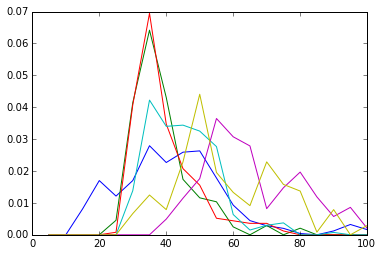

In [15]:
for ens in tis.ensembles:
    myhist = tis.histograms['pathlength'][ens]
    plt.plot(myhist.plot_bins(), myhist.normalized())

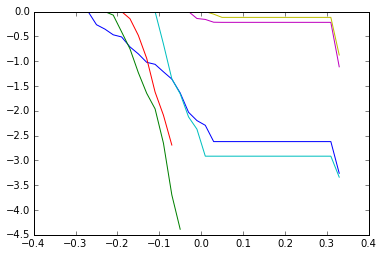

In [16]:
for ens in tis.ensembles:
    myhist = tis.histograms['max_lambda'][ens]
    plt.plot(myhist.plot_bins(), np.log(myhist.reverse_cumulative()))

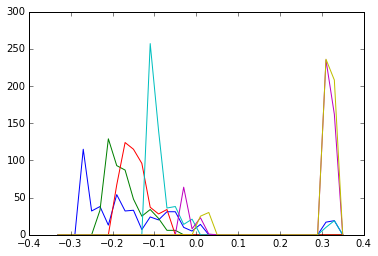

In [18]:
for ens in tis.ensembles:
    myhist = tis.histograms['max_lambda'][ens]
    plt.plot(myhist.plot_bins(), myhist())

In [23]:
import openpathsampling.toy_dynamics as toys
pes = (toys.toy_pes.OuterWalls([1.0, 1.0], [0.0, 0.0]) + 
       toys.toy_pes.Gaussian(2.0, [1.0, 4.0], [0.0,1.0]) + 
       toys.toy_pes.Gaussian(2.0, [25.0, 1.0], [0.0, -1.0])
      )
from toy_plot_helpers import ToyPlot
plot = ToyPlot()
plot.add_pes(pes)

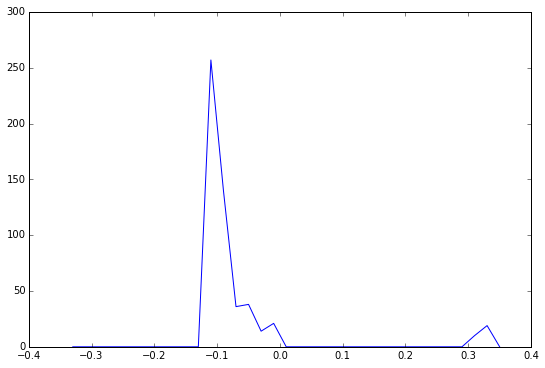

In [67]:
myhist = tis.histograms['max_lambda'][tis.ensembles[0]]
plt.plot(myhist.plot_bins(), myhist())

In [73]:
ens0_traj = [s.trajectory for s in storage.sample if s.ensemble == tis.ensembles[0]]
len(ens0_traj)

495

In [75]:
ens0_acc = [s.details.accepted for s in storage.sample if s.ensemble == tis.ensembles[0]]

In [79]:
tot = 0
for acc in ens0_acc:
    tot += 1 if acc==True else 0
float(tot) / len(ens0_acc)

0.898989898989899

In [80]:
ens0_acc = [s.details.start_point.sum_bias for s in storage.sample if s.ensemble == tis.ensembles[0]]

AttributeError: 'MoveDetails' object has no attribute 'start_point'

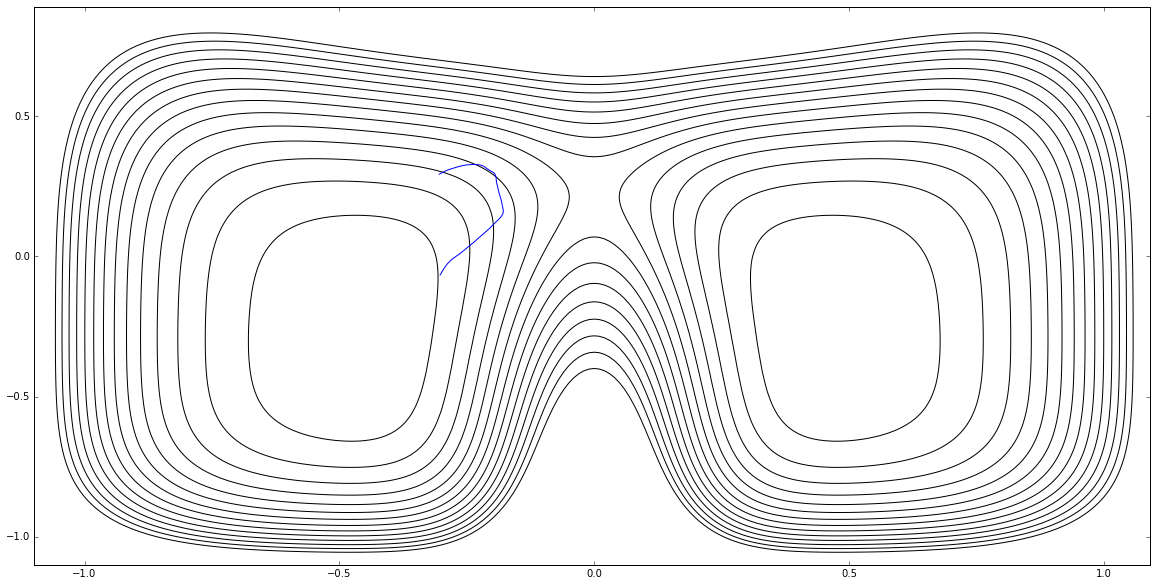

In [72]:
plt.figure(figsize=(20,10))
plt.contour(plot.X, plot.Y, plot._pes, levels=np.arange(0.0, 1.5, 0.1), colors='k')
for mytraj in [ens0_traj[0]]:#[slice(None,None,10)]:
    plt.plot(mytraj.coordinates()[:,0,0], mytraj.coordinates()[:,0,1])

In [36]:
df = histograms_to_pandas_dataframe(tis.histograms['max_lambda'].values(), fcn="reverse_cumulative")
from openpathsampling.analysis.wham import WHAM
wham = WHAM()
wham.load_from_dataframe(df)
wham.clean_leading_ones()
wham_hist = wham.wham_bam_histogram()

KeyError: 4

In [23]:
from openpathsampling.analysis.histogram import histograms_to_pandas_dataframe
df = histograms_to_pandas_dataframe(tis.histograms['max_lambda'].values())
df

,max_lambda A->B I'face 5,max_lambda A->B I'face 0,max_lambda A->B I'face 4,max_lambda A->B I'face 2,max_lambda A->B I'face 1,max_lambda A->B I'face 3
-0.34,0,0,0,0,0,0
-0.33,0,0,0,0,0,0
-0.32,0,0,0,0,0,0
-0.31,0,0,0,0,0,0
-0.30,0,0,0,0,0,0
-0.29,0,0,0,0,0,0
-0.28,0,75,0,0,0,0
-0.27,0,24,0,0,0,0
-0.26,0,12,0,0,0,0
-0.25,0,8,0,0,0,0
